In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline # this is used to run matplotlib library in jupyter notebook

In [3]:
df = pd.read_csv("C:\\Users\\ARNAB DAS\\Desktop\\ML\\Insurance.csv")
df.head(3)

,age,bought_insurance
0,22,0
1,25,0
2,47,1


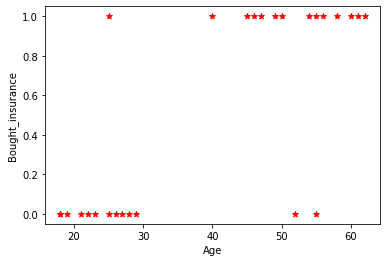

In [35]:
#calling function to create a scatter plot
#plt.plot_type(x_axes variable,y_axes variable,color='',marker='')
plt.xlabel('Age')
plt.ylabel('Bought_insurance')
plt.scatter(df.age,df.bought_insurance,color='red',marker='*')


In [8]:
# Now in case of logistic regression...we have to devide the data sets into 3 part-->training data, test data, prediction data
#For that we can not call linearRegression from sklearn library
#we have to call train_test_split function
from sklearn.model_selection import train_test_split

In [12]:
#This is the syntex for train_test_split function
#train_test_split(dataframe.x_axes variable,dataframe.y_axes variable,train_size=--)
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8) # training size 0.8 means we will take 80% of data for training and 20% for other purpose

In [14]:
#SO here the computer will take 80% of the total data for training by its own automatically or randomly
#Lets see!
X_train

,age
24,50
23,45
15,55
18,19
6,55
9,61
10,18
25,54
8,62
14,49


In [15]:
X_test

,age
13,29
19,18
11,28
17,58
3,52
20,21


In [17]:
y_train.head(3)

24    1
23    1
15    1
Name: bought_insurance, dtype: int64

In [20]:
#Now its time to draw the LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression #we can not add '()' here
#Now giving a name to this Logistic Regression model
model = LogisticRegression()

In [21]:
#Now we have to train the model for which we use fit() method
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
X_train

,age
24,50
23,45
15,55
18,19
6,55
9,61
10,18
25,54
8,62
14,49


In [28]:
# Assigning a variable named y_predicted for saving the predicted values using X_train datas
y_predicted = model.predict(X_train)
y_predicted

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [45]:
#If we want the probability
df1=model.predict_proba(X_test) 
df1# Here on the output values 0.69 means 69% buying probability and 0.3 means 30% not buying probability

array([[0.69986615, 0.30013385],
       [0.91988537, 0.08011463],
       [0.72940018, 0.27059982],
       [0.03369774, 0.96630226],
       [0.07680857, 0.92319143],
       [0.88142851, 0.11857149]])

In [31]:
# Now lets check the performance or probability of giving the correct answer of this model
model.score(X_test,y_test) # And we found that our model can predict the correct answers about 83.3% of total tests

0.8333333333333334

In [32]:
#The logistic regression is mainly SIGMOID function 
#Sigmoid Function is: y= 1/(1+e^-y) where y=m*x+b
#Now lets see the coefficient m
model.coef_

array([[0.14492091]])

In [33]:
#And the intercept b
model.intercept_

array([-5.04936693])

ValueError: Found array with dim 4. Estimator expected <= 2.

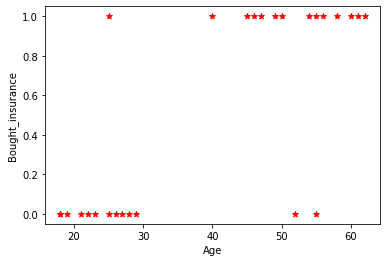

In [59]:
##Now lets draw the curve line 
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Bought_insurance')
plt.scatter(df.age,df.bought_insurance,color='red',marker='*')
#For getting the regression line...now import seaborn library...its easy
#import seaborn as sns
#sns.regplot(x='age', y='bought_insurance', data=, logistic=True)

x_range = 50
Xs = [i for i in range(x_range)]
Ys = [model.predict_proba([[X_test]])[0][1] for value in range(x_range)]

#plt.scatter(df['age'], df['bought_insurance'])
plt.plot(Xs, Ys, color='blue')

##OOPs could not do the graph